## Failure analysis for an industry equipment

##### Air compressors are responsible for generating and distributing compressed air for pneumatic systems such as valve controllers, actuators, blowing systems and other process functions within an industry.

##### The failure predict project aims to identify signs that may indicate that there is an abnormal operation of the equipment in order to act before the faha happens and thus reduce costs and has emergencies in the treatment of the problem

### Import libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

## Data base pre working

In [3]:
# Dataset used in this project is a monthly data collected by sensors that includes the equipment current (Ampere), air flow volume (m³/h) and air pressure (KPa)

df = pd.read_excel('Datasets/dataset_comp.xlsx')

In [11]:
df.head()

,Timestamp,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
0,2021-12-01 00:00:00,96.900002,92.599998,97.000000,97.400002,21204.308594,516.897827
1,2021-12-01 00:01:00,96.900002,92.500000,97.000000,97.400002,21073.390625,516.804749
2,2021-12-01 00:02:00,96.900002,92.300003,96.900002,97.800003,21070.710938,517.828857
3,2021-12-01 00:03:00,96.800003,92.500000,97.000000,97.400002,21106.867188,518.573669
4,2021-12-01 00:04:00,97.000000,92.599998,97.199997,97.400002,21230.927734,518.759949


In [12]:
df.describe()

,corrente_cp11,corrente_cp12,corrente_cp13,corrente_cp31,vazaro_ar,pressao_ar
count,61921.000000,61921.000000,61921.000000,61921.000000,61921.000000,61921.000000
mean,95.246340,91.170718,89.628754,96.314404,21030.963462,512.345541
std,11.679920,8.173813,34.520230,1.977443,1343.395800,33.929872
min,-37.500000,-37.500000,-37.500000,89.000000,11073.125000,291.127441
25%,94.599998,90.300003,94.400002,94.800003,21026.439453,503.863678
50%,95.800003,91.500000,96.400002,96.099998,21348.976562,516.246155
75%,98.199997,93.099998,100.699997,97.800003,21596.218750,526.766602
max,109.400002,97.300003,114.400002,105.900002,23066.876953,637.836365


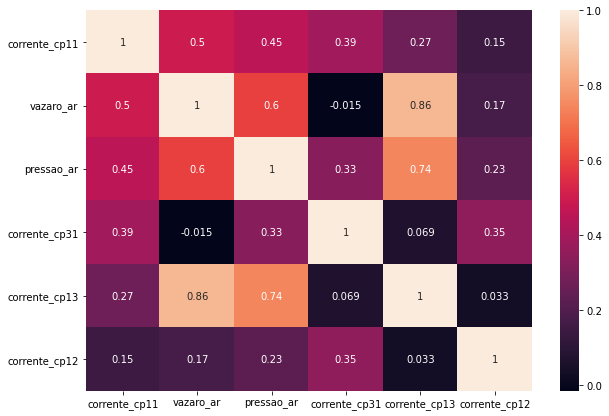

In [4]:
# Correlation matrix to understand the relationship between variables

correlacao = df.corr()

f, ax = plt.subplots(figsize = (10,7))
top_correlacao = df[correlacao.corrente_cp11.sort_values(ascending = False)[:10].index].corr()
sns.heatmap(top_correlacao, annot = True)
plt.show()

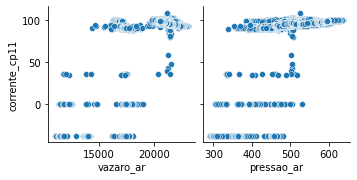

In [14]:
# Evaluating the relationship between the values of highest correlation graphically

ax = sns.pairplot(df, y_vars = 'corrente_cp11', x_vars = ['vazaro_ar', 'pressao_ar'])

##### It is necessary to clean the outliers identified at current values below 50 A. This number makes no sense talking about the operational routine